# Linear Regression using the Spotify Charts Dataset

Can you build a linear model to predict a song's popularity using the metrics provided as features?

The relevant metrics are 'popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness',
 'liveness', 'valence', and 'tempo'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,88,0.358,0.557,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,87,0.748,0.524,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,1,0.783,0.623,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          3284 non-null   object 
 1   track_name        3279 non-null   object 
 2   artist_id         3284 non-null   object 
 3   artist_name       3279 non-null   object 
 4   album_id          3284 non-null   object 
 5   duration          3284 non-null   int64  
 6   release_date      3284 non-null   object 
 7   popularity        3284 non-null   int64  
 8   danceability      3284 non-null   float64
 9   energy            3284 non-null   float64
 10  key               3284 non-null   int64  
 11  loudness          3284 non-null   float64
 12  mode              3284 non-null   int64  
 13  speechiness       3284 non-null   float64
 14  acousticness      3284 non-null   float64
 15  instrumentalness  3284 non-null   float64
 16  liveness          3284 non-null   float64


In [4]:
# remove null
df = df[~df['track_name'].isnull()]
len(df)

3279

In [5]:
#filter unnecessary fields
df =df[['popularity', 'danceability', 'energy',
       'loudness','speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]
df.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,76,0.578,0.574,-6.209,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,88,0.358,0.557,-7.398,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,87,0.748,0.524,-5.599,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,71,0.662,0.586,-8.821,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,1,0.783,0.623,-6.126,0.0800,0.338,0.00000,0.0975,0.447,100.048


### 1. Explore the dataset

In [6]:
#Make a table of distribution stats of song metrics using df.describe

df[['popularity', 'danceability', 'energy',
       'loudness','speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,51.801464,0.634323,0.602229,-6.767701,0.082555,0.273213,0.009939,0.169303,0.458960,118.572526
std,30.181148,0.141427,0.187310,2.736666,0.081633,0.273254,0.070286,0.130588,0.215028,27.670082
min,0.000000,0.174000,0.025000,-24.250000,0.023200,0.000002,0.000000,0.021500,0.034900,52.572000
25%,31.000000,0.544500,0.475000,-8.139000,0.035950,0.045900,0.000000,0.092800,0.291000,97.980000
50%,63.000000,0.651000,0.617000,-6.344000,0.051900,0.170000,0.000000,0.118000,0.449000,115.884000
75%,74.000000,0.735000,0.744000,-4.859000,0.089700,0.450000,0.000020,0.200000,0.612000,136.041000
max,100.000000,0.980000,0.978000,0.175000,0.884000,0.981000,0.908000,0.955000,0.978000,215.090000


/home/pollux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/pollux/anaconda3/lib/python3.8/site-packages/matplot

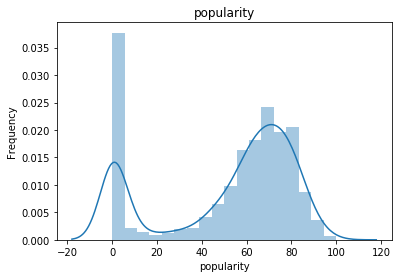

/home/pollux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/pollux/anaconda3/lib/python3.8/site-packages/matplot

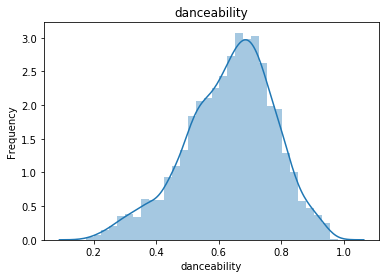

/home/pollux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/pollux/anaconda3/lib/python3.8/site-packages/matplot

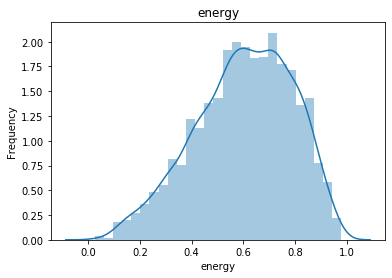

/home/pollux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/pollux/anaconda3/lib/python3.8/site-packages/matplot

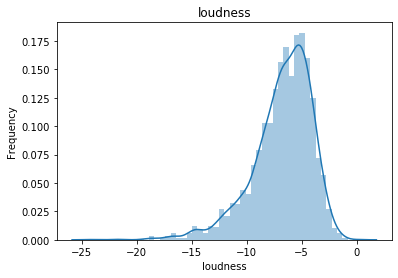

/home/pollux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/pollux/anaconda3/lib/python3.8/site-packages/matplot

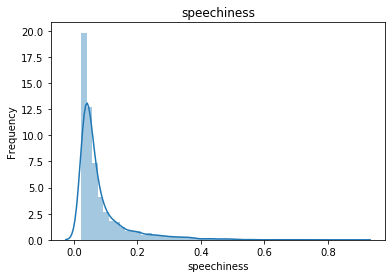

/home/pollux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/pollux/anaconda3/lib/python3.8/site-packages/matplot

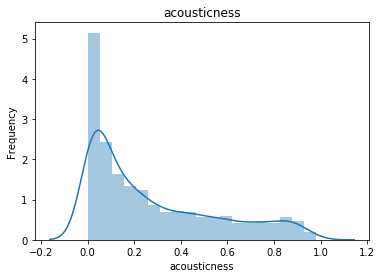

/home/pollux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/pollux/anaconda3/lib/python3.8/site-packages/matplot

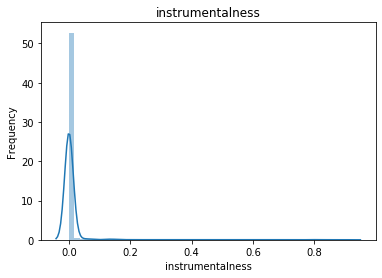

/home/pollux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/pollux/anaconda3/lib/python3.8/site-packages/matplot

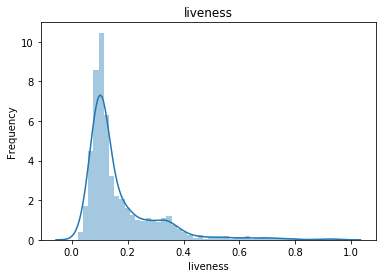

/home/pollux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/pollux/anaconda3/lib/python3.8/site-packages/matplot

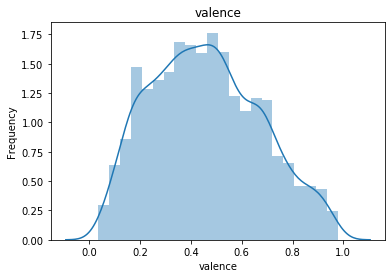

/home/pollux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/pollux/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/pollux/anaconda3/lib/python3.8/site-packages/matplot

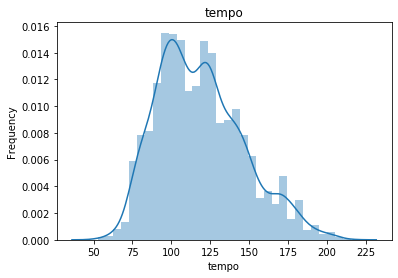

In [7]:
# Visualize histograms of each song metric
for col in ['popularity', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    sns.distplot(df[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()


### 2. Feature Engineering

Normalize loudness and tempo. 
>Q: Whats the best norm to use for each?


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['loudness'] = scaler.fit_transform(df[['loudness']])
df.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,76,0.578,0.574,0.738628,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,88,0.358,0.557,0.689949,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,87,0.748,0.524,0.763603,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,71,0.662,0.586,0.631689,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,1,0.783,0.623,0.742027,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['tempo'] = scaler.fit_transform(df[['tempo']])
df.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,76,0.578,0.574,0.738628,0.0454,0.196,0.00000,0.0830,0.301,0.748102
1,88,0.358,0.557,0.689949,0.0590,0.695,0.00000,0.0902,0.494,0.199799
2,87,0.748,0.524,0.763603,0.0338,0.414,0.00000,0.1110,0.661,0.261128
3,71,0.662,0.586,0.631689,0.0307,0.097,0.00272,0.1150,0.296,0.230301
4,1,0.783,0.623,0.742027,0.0800,0.338,0.00000,0.0975,0.447,0.292128


Visualize the new loudness and tempo distributions

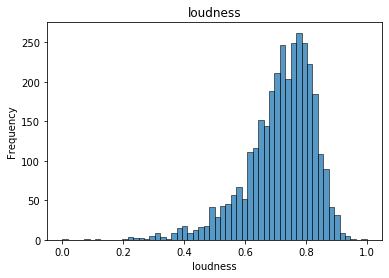

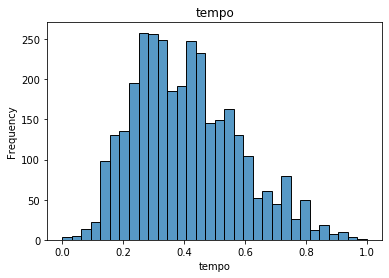

In [10]:
# Visualize histograms of each song metric
for col in ['loudness', 'tempo']:
    sns.histplot(df[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()


### 3. Examine Features

To reduce variability, we could limit our analysis to only those songs that are sufficiently popular

In [11]:
#filter songs with above median popularity
df= df[df['popularity']>=61]
df = df.reset_index(drop=True)
len(df)

1799

Pick 3 features that you think would give you a good fit.
>Q: *Hypothesis*: Why do you think these 3 could be a good predictor for popularity?

Visualize the relationship between the features and the response using scatterplots

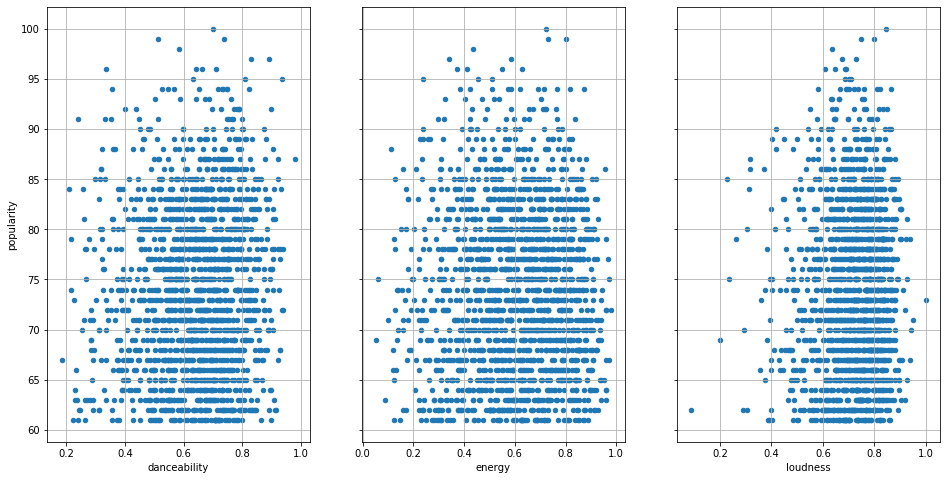

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
df.plot(kind='scatter', x='danceability', y='popularity', ax=axs[0], grid=True)
df.plot(kind='scatter', x='energy', y='popularity', ax=axs[1], grid=True)
df.plot(kind='scatter', x='loudness', y='popularity', ax=axs[2], grid=True)

### 4. Fit the Model

Do the following steps for each of your selected features:

a. Determine best fit line coefficients

In [13]:
from sklearn.linear_model import LinearRegression

feature_cols = ['danceability']
X = df[feature_cols]
y = df['popularity']

model = LinearRegression(fit_intercept=True)
model.fit(X,y)

print('Model slope: %0.4f' % model.coef_[0])
print('Model intercept: %0.4f' % model.intercept_)


Model slope: 4.6389
Model intercept: 70.9952


b. Obtain the R2 for the fit

In [14]:
print('Model R2: %0.4f' % model.score(X,y))

Model R2: 0.0064


>Q: Interpret the model coefficients. What does the R2 value tell you about the fitted model?

An increase of 0.1 in danceability will result to an increase of popularity by 0.7 points. 
But based from the R2, this is a very bad fit and so we hold back from this interpretation.

c. Compute for RMSE and MAE

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#define RMSE function
def RMSE(model, X, y):
    predicted = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predicted))
    return rmse
  
#define MAE function
def MAE(model, X, y):
    predicted = model.predict(X)
    mae = mean_absolute_error(y, predicted)
    return mae

In [16]:
print('Model RMSE: %0.4f' % RMSE(model,X,y))
print('Model MAE: %0.4f' % MAE(model,X,y))

Model RMSE: 8.1133
Model MAE: 6.7576


>Q: What does the RMSE and MAE tell you about the model performance?

The model's predicted popularity is more or less expected to be off by 8.22 points (conservative) or 6.9 points (equal weighting) for all songs considered

d. Check for outliers and determine if removing them could result to a better fit

In [17]:
q1 = df['popularity'].quantile(0.25)
q3 =  df['popularity'].quantile(0.75)
IQR = q3 -q1

outliers = df[(df['popularity']<(q1-1.5*IQR))&(df['popularity']>(q3+1.5*IQR))]['popularity']
outliers

Series([], Name: popularity, dtype: int64)

### 5. Using multiple features

Will using all 3 of your chosen features result into a better fit? Repeat the procedure in 4 and see if the metrics improve.
If it did improve, do you think its enough to make the model more credible?

In [18]:
# create X and y
feature_cols = ['danceability', 'energy', 'loudness']
X = df[feature_cols]
y = df['popularity']

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

69.81950450158243
[('danceability', 4.6825256071996035), ('energy', -2.665361236979938), ('loudness', 3.834301935881562)]


In [19]:
# calculate the R-squared
lm.score(X, y)

0.007954129460828074

### 6. Using k-fold cross validation
We could further investigate on the models predictive performance using k-fold cross validation.
What does folding reveal about the linear model you built?

- For the model you built in (5), try the validation procedure for k=5 and k=10



In [20]:
X = X.to_numpy()
Y = y.to_numpy()

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=False)


for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(np.shape(X_test), np.shape(Y_test))
    
    #fit using training data
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    
    #evaluate fit of train data
    print('train: R2=%0.2f '% lin_model.score(X_train, Y_train))

    #evaluate using test data
    print('test: RMSE=%0.2f, R2=%0.2f' % (RMSE(lin_model, X_test, Y_test), lin_model.score(X_test,Y_test)))

train: R2=0.01 
test: RMSE=7.67, R2=-0.15
train: R2=0.01 
test: RMSE=7.81, R2=-0.11
train: R2=0.01 
test: RMSE=7.63, R2=-0.02
train: R2=0.00 
test: RMSE=8.02, R2=-0.01
train: R2=0.01 
test: RMSE=9.91, R2=-0.11


> All training sets show poor fit. Some test sets produced relatively better fits, but this is only local to the fold since RMSE remains high.